Trial 50 Complete [00h 00m 12s]
val_loss: 0.09226526568333308

Best val_loss So Far: 0.08608096837997437
Total elapsed time: 00h 09m 27s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
{'space': [{'class_name': 'Float', 'config': {'name': 'dropout_rate', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Choice', 'config': {'name': 'optimizer', 'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}}, {'class_name': 'Int', 'config': {'name': 'batch_size', 'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'beta1', 'default': 0.5, 'conditions': [], 'values': [0.5, 0.75, 0.999], 'ordered': True}}, {'class_name': 'Choice', 'config': {'nam

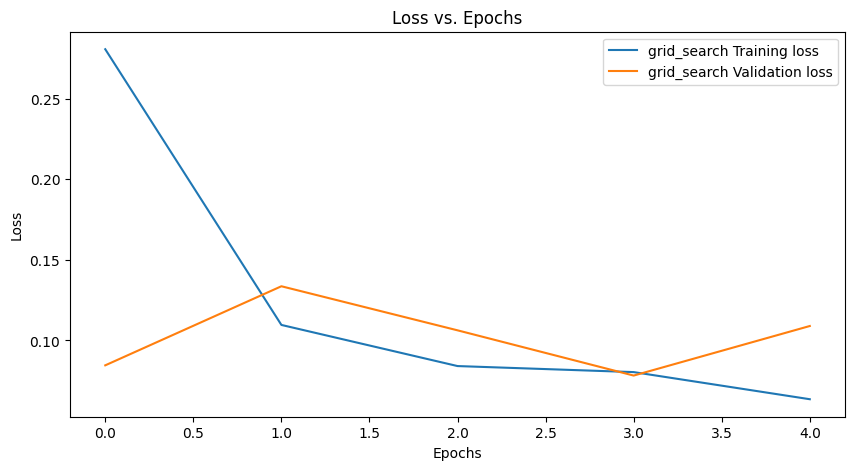

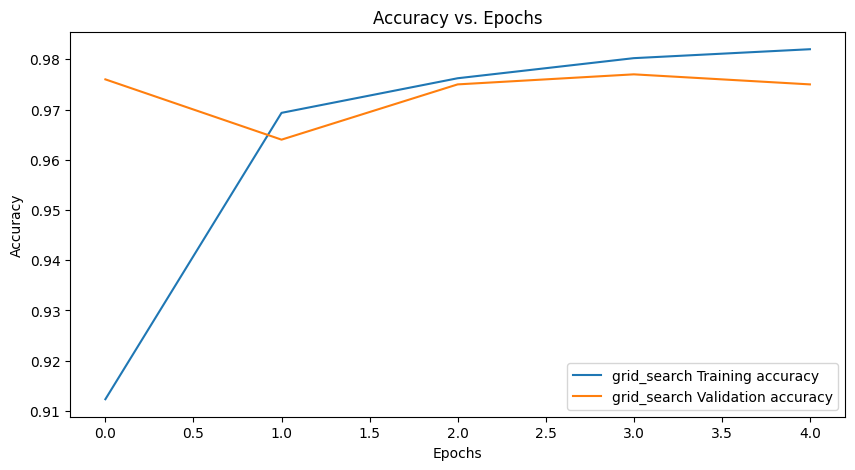

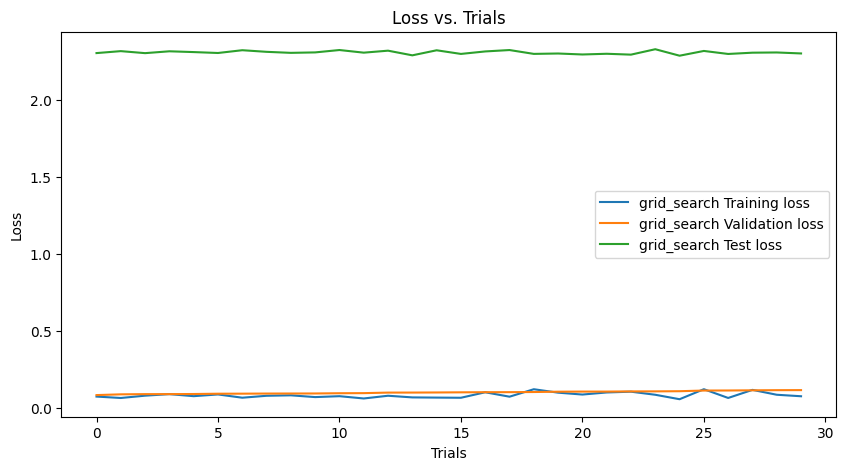

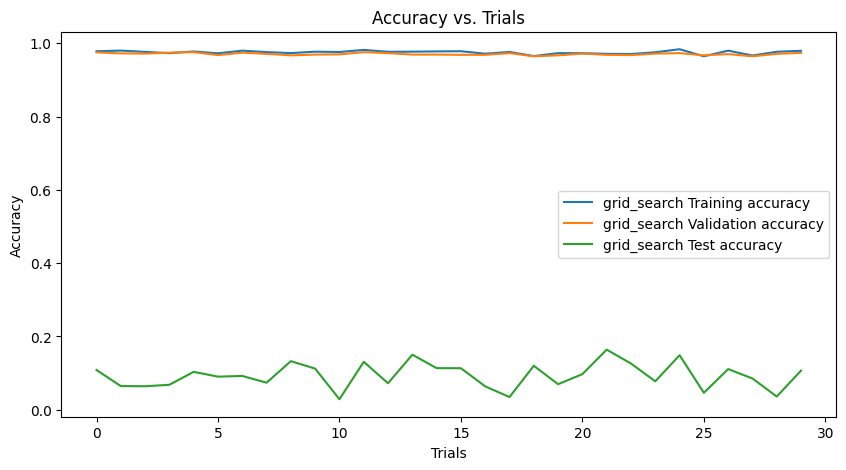

In [1]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["grid_search"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "trail#2_10000", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "trail#2_10000", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

2023-04-25 17:06:55.819205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 17:06:56.275081: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Running random_search...
INFO:tensorflow:Reloading Tuner from trail#2_10000/random/tuner0.json
Search space summary
Default search space size: 7
dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}
batch_size (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
beta1 (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.75, 0.999], 'ordered': True}
beta2 (Choice)
{'default': 0.5, 'conditions': [], 'values': [0.5, 0.75, 0.999], 'ordered': True}
momentum (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.5, 0.99], 'ordered': True}
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
{'space': [{'class_name': 'Float', 'config'

2023-04-25 17:07:43.065073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 17:07:43.113382: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 17:07:43.113594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-25 17:07:43.114556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other 

141/141 [==============================] - 3s 3ms/step - loss: 0.3387 - accuracy: 0.8980 - val_loss: 0.1368 - val_accuracy: 0.9620
Epoch 2/5
141/141 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9644 - val_loss: 0.0738 - val_accuracy: 0.9790
Epoch 3/5
141/141 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9718 - val_loss: 0.0702 - val_accuracy: 0.9750
Epoch 4/5
141/141 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9762 - val_loss: 0.1242 - val_accuracy: 0.9670
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9781
Test loss: 0.07185642421245575
Test accuracy: 0.9781000018119812
Best hyperparameters:  {'space': [{'class_name': 'Float', 'config': {'name': 'dropout_rate', 'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'con

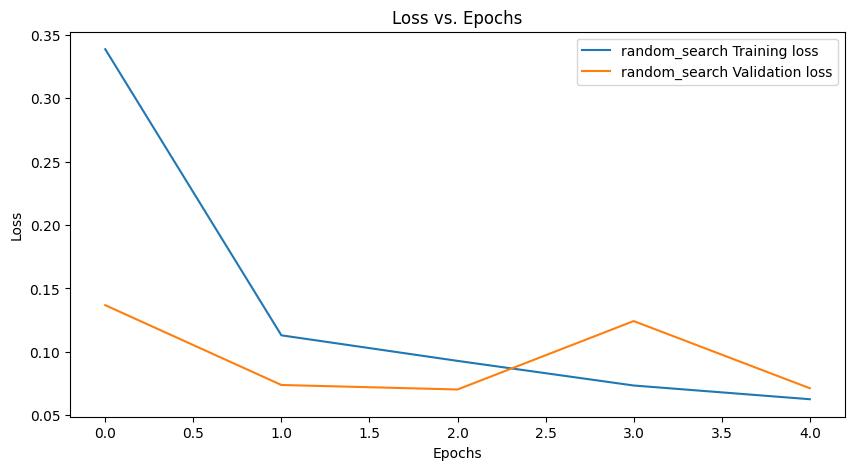

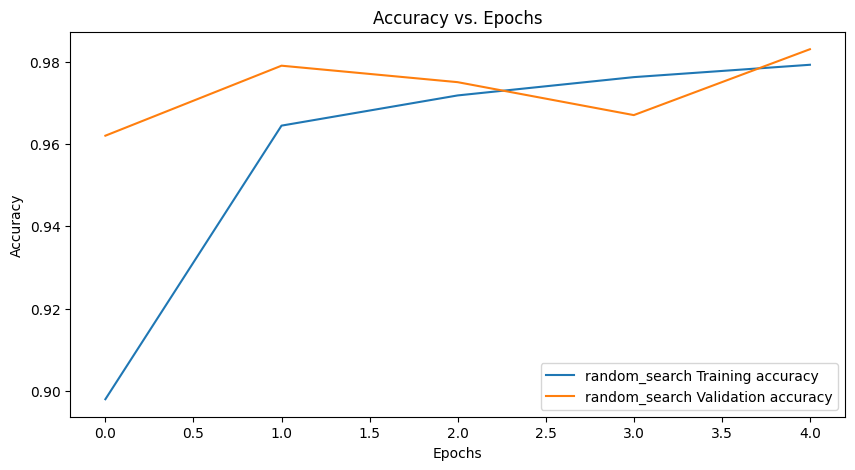

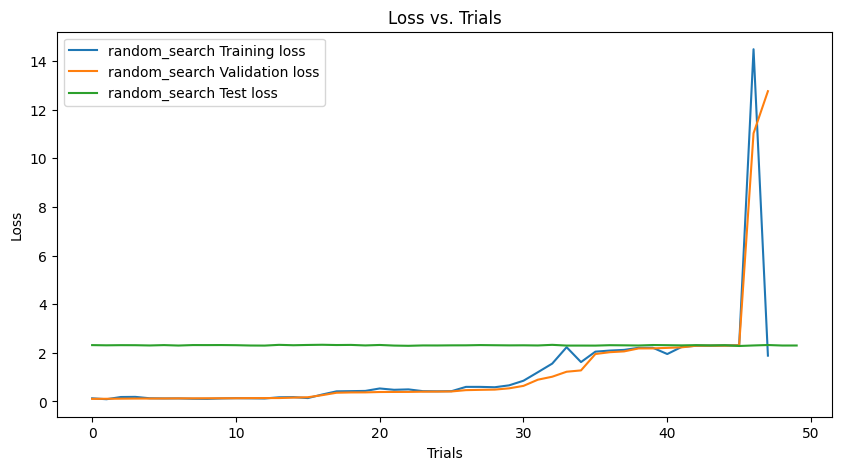

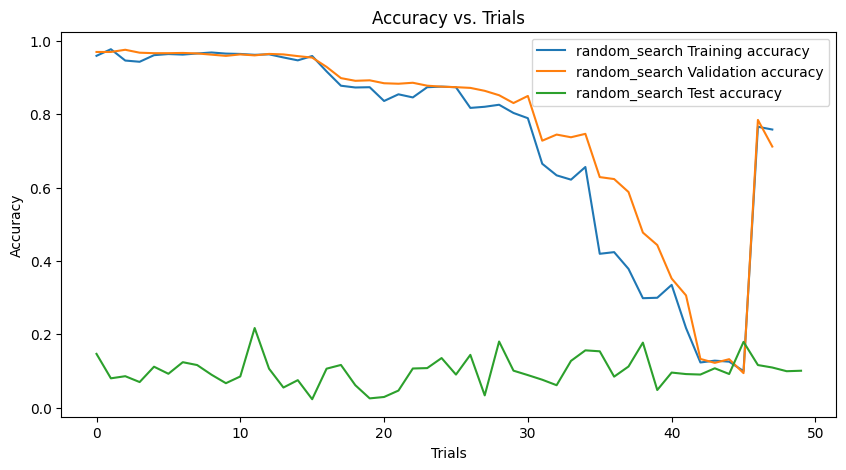

In [1]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["random_search"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "trail#2_10000", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "trail#2_10000", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

In [2]:
from myMain import DataLoader, MyHyperModel, NelderMeadHyperModel, TunerWrapper, PlotResults

if __name__ == "__main__":
    data_loader = DataLoader(n=60000)
    x_train, y_train, x_test, y_test = data_loader.load_data()

    # algorithms = ["grid_search", "random_search", "nelder_mead"]
    algorithms = ["nelder_mead"]
    results = {}
    results_trail = {}

    for algorithm in algorithms:
        print(f"Running {algorithm}...")

        if algorithm == "nelder_mead":
            hypermodel = NelderMeadHyperModel(num_classes=10)
        else:
            hypermodel = MyHyperModel(num_classes=10)

        tuner_wrapper = TunerWrapper(x_train, y_train, x_test, y_test)

        if algorithm == "grid_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.grid_search(hypermodel, "trail#2_10000", "grid")
        elif algorithm == "random_search":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.random_search(hypermodel, "trail#2_10000", "random")
        elif algorithm == "nelder_mead":
            best_model, histories, histories_trail, best_parameters = tuner_wrapper.nelder_mead_search(hypermodel)

        results_trail[algorithm] = histories_trail
        results[algorithm] = histories.history

    if isinstance(best_parameters, dict):
        print("Best hyperparameters: ", best_parameters)
    else:
        if algorithm == 'nelder_mead':
            print("Best hyperparameters: ", best_parameters)
        else:
            print("Best hyperparameters: ", best_parameters.get_config())

    # Plot the results
    myplot = PlotResults(results, results_trail)
    myplot.plot_loss_epoch()
    myplot.plot_accuracy_epoch()
    myplot.plot_loss_trials()
    myplot.plot_accuracy_trials()

Running nelder_mead...
Epoch 1/5
282/282 [==============================] - 2s 5ms/step - loss: 2.0696 - accuracy: 0.4188 - val_loss: 1.2787 - val_accuracy: 0.7640
Epoch 2/5
282/282 [==============================] - 1s 4ms/step - loss: 0.7047 - accuracy: 0.8037 - val_loss: 0.4467 - val_accuracy: 0.8490
Epoch 3/5
282/282 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8766 - val_loss: 0.3176 - val_accuracy: 0.9080
Epoch 4/5
282/282 [==============================] - 1s 5ms/step - loss: 0.3345 - accuracy: 0.9021 - val_loss: 0.2728 - val_accuracy: 0.9170
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2423 - accuracy: 0.9307
Test loss: 0.24234750866889954
Test accuracy: 0.9307000041007996


AttributeError: 'numpy.ndarray' object has no attribute 'get_config'

Best hyperparameters:  [0.00100034 0.50000254 0.10000218 0.99999457 0.90000061 0.99899736
 0.90000031]


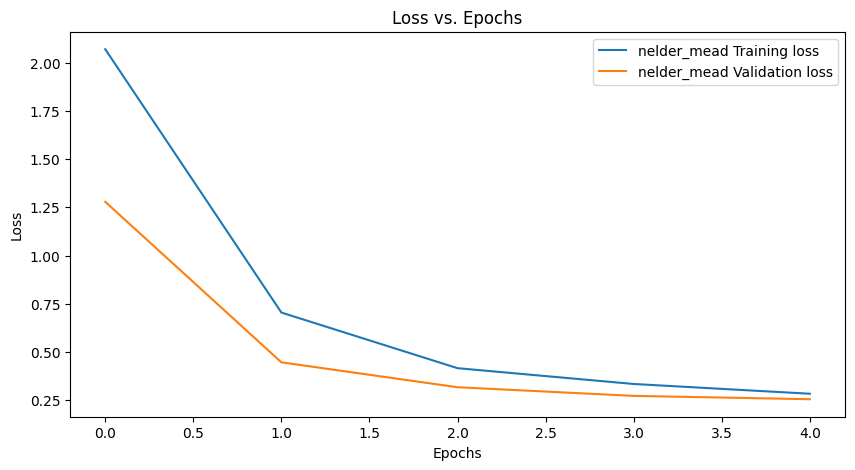

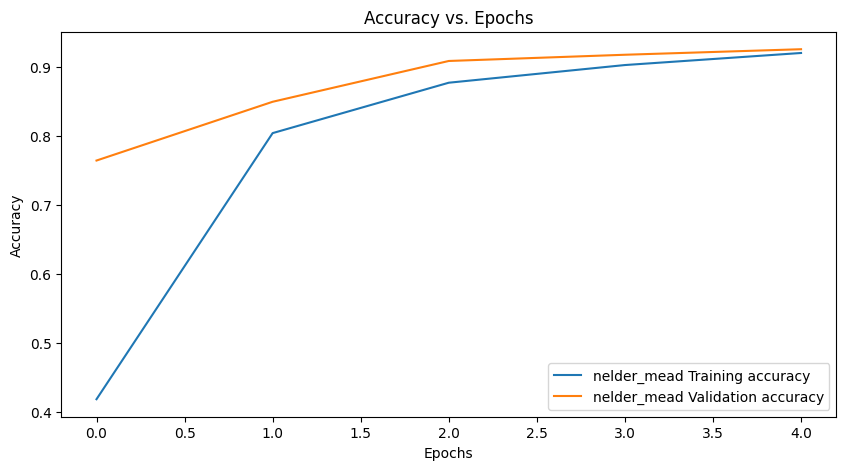

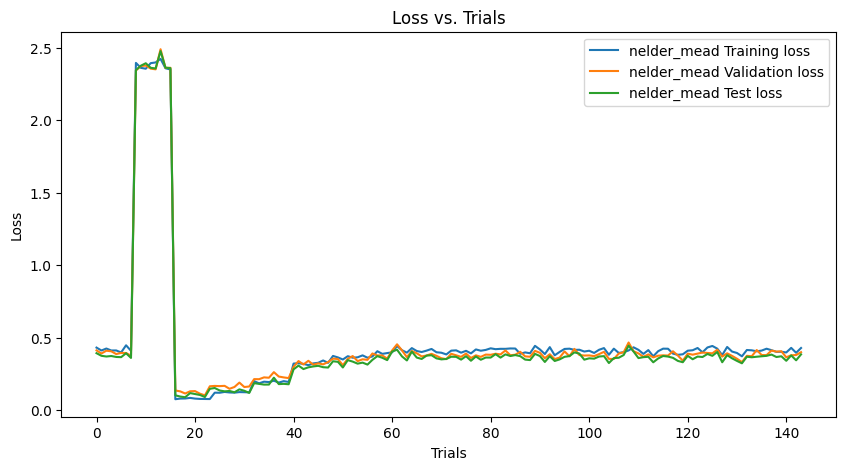

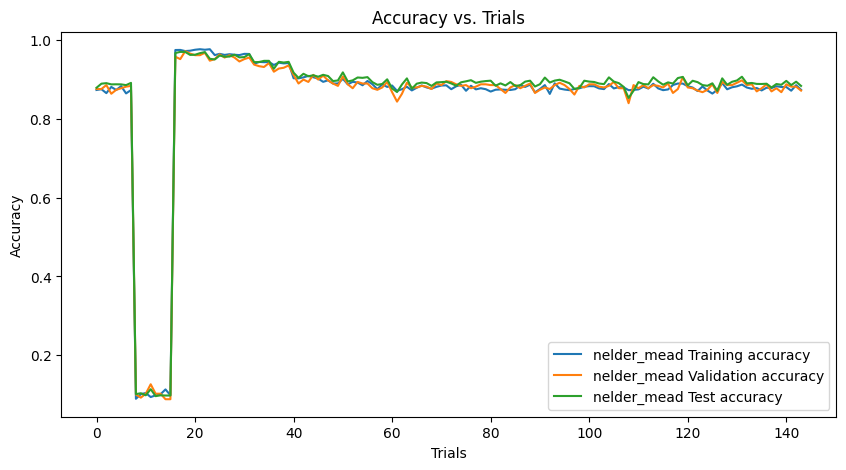

In [3]:
# if isinstance(best_parameters, dict):
#     print("Best hyperparameters: ", best_parameters)
# else:
#     if algorithm == 'nelder_mead':
#         print("Best hyperparameters: ", best_parameters)
#     else:
#         print("Best hyperparameters: ", best_parameters.get_config())

# # Plot the results
# myplot = PlotResults(results, results_trail)
# myplot.plot_loss_epoch()
# myplot.plot_accuracy_epoch()
# myplot.plot_loss_trials()
# myplot.plot_accuracy_trials()